## Notes

From: http://scikit-learn.org/stable/modules/svm.html.

`SVC` and `NuSVC` are similar methods, but accept slightly different sets of parameters and have different mathematical formulations.

`NuSVC`, Nu-Support Vector Classification, similar to SVC but uses a parameter to control the number of support vectors.

On the other hand, `LinearSVC` is another implementation of Support Vector Classification for the case of a linear kernel. Note that LinearSVC does not accept keyword `kernel`, as this is assumed to be linear.

SVC and NuSVC implement the “one-against-one” approach for multi-class classification. If n_class is the number of classes, then $n_class * (n_class - 1) / 2$ classifiers are constructed and each one trains data from two classes.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import itertools
from plot_confusion import plot_confusion_matrix
%matplotlib inline

In [5]:
xtrain = np.loadtxt('Data/train_data.csv', delimiter=',')
ytrain = np.loadtxt('Data/train_labels.csv', delimiter=',')
xtest = np.loadtxt('Data/test_data.csv', delimiter=',')
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

m = xtrain.shape[0]
chc = np.random.choice(m, int(m/5))
xtrain_s = xtrain[chc,:]
ytrain_s = ytrain[chc]

(872,)


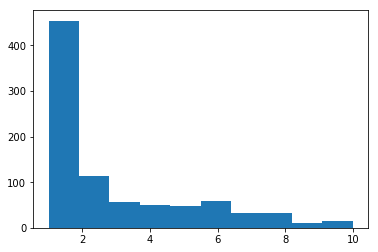

In [6]:
print(ytrain_s.shape)
plt.hist(ytrain_s)
plt.show()

In [15]:
C_ = 2.9
#the probability is set to true here to calculate the probabilities per class. However, this slows down the computation!
clf = svm.SVC(decision_function_shape='ovo', random_state=42, C=C_,probability=True)
fit = clf.fit(xtrain, ytrain)
print(fit.score(xtrain, ytrain))
ypred = fit.predict(xtest)

0.909465963786


In [16]:
#compute the predicted why based on five-fold cross validation
y_pred_cross = cross_val_predict(clf,xtrain,ytrain,cv=5)

In [17]:
scores = cross_val_score(clf, xtrain, ytrain, cv=5).mean()

In [18]:
print(scores)

0.662830016409


In [19]:
ypred_prob=clf.predict_proba(xtest)

In [25]:
ypred_prob

array([[  8.30846840e-02,   6.03065251e-02,   6.45376022e-01, ...,
          9.71142541e-04,   1.34634700e-02,   3.27572826e-03],
       [  6.68066036e-02,   2.74089267e-02,   2.40210094e-01, ...,
          4.35738351e-03,   4.23626119e-01,   7.96581119e-03],
       [  8.23529446e-01,   1.06029518e-02,   1.55923858e-03, ...,
          4.90116269e-02,   6.69707034e-04,   9.72011369e-03],
       ..., 
       [  5.86106590e-01,   9.35879307e-02,   2.73903703e-02, ...,
          1.38027268e-01,   3.32619706e-03,   4.53644399e-02],
       [  2.21018207e-02,   7.03911726e-02,   8.92227739e-01, ...,
          4.93259856e-04,   1.82050181e-03,   7.52466825e-04],
       [  6.15239452e-01,   2.82725301e-02,   5.95615348e-03, ...,
          1.06628355e-01,   2.36492714e-03,   2.25500283e-02]])

In [24]:
ypred

array([ 3.,  9.,  1., ...,  1.,  3.,  1.])

In [26]:
np.argmax(ypred_prob,axis=1)+1

array([3, 9, 1, ..., 1, 3, 1])

In [27]:
#make a submissson for the log loss
subm = pd.DataFrame(ypred_prob,columns=['Class_'+str(i) for i in range(1,11)])
#round was to test if the score changes, but it doesn't
subm=subm.round(4)
subm.index += 1
subm.to_csv('Solutions/probabilities_svm_2411.csv',
            index_label='Sample_id')

In [11]:
conf_mat = confusion_matrix(ytrain,y_pred_cross)

Normalized confusion matrix
[[  8.98530762e-01   4.95867769e-02   8.72359963e-03   7.80532599e-03
    5.50964187e-03   1.92837466e-02   9.18273646e-04   6.88705234e-03
    2.29568411e-03   4.59136823e-04]
 [  3.12297735e-01   6.16504854e-01   3.07443366e-02   1.77993528e-02
    4.85436893e-03   1.29449838e-02   0.00000000e+00   1.61812298e-03
    3.23624595e-03   0.00000000e+00]
 [  1.56441718e-01   9.20245399e-02   6.90184049e-01   6.13496933e-03
    6.13496933e-03   3.37423313e-02   0.00000000e+00   0.00000000e+00
    1.53374233e-02   0.00000000e+00]
 [  3.32015810e-01   9.48616601e-02   1.18577075e-02   4.82213439e-01
    1.58102767e-02   5.13833992e-02   0.00000000e+00   3.95256917e-03
    0.00000000e+00   7.90513834e-03]
 [  6.30841121e-01   5.60747664e-02   4.20560748e-02   2.80373832e-02
    1.58878505e-01   3.73831776e-02   4.67289720e-03   1.86915888e-02
    2.33644860e-02   0.00000000e+00]
 [  4.38461538e-01   4.61538462e-02   8.84615385e-02   4.61538462e-02
    1.92307692e-0

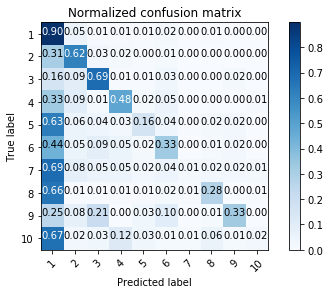

In [13]:
plot_confusion_matrix(conf_mat, classes=[1,2,3,4,5,6,7,8,9,10], normalize=True,
                      title='Normalized confusion matrix')

In [17]:
#try with best values from gridsearch on part of the data
#-->apparently not better performance, only more overfitting. 

In [9]:
C2=3.8421052631578947
gamma2=0.005623413251903491

In [12]:
clf2 = svm.SVC(decision_function_shape='ovo', random_state=42, C=C2,gamma=gamma2)
fit2 = clf2.fit(xtrain, ytrain)
print(fit2.score(xtrain, ytrain))

0.987393994958


In [13]:
#compute the predicted why based on five-fold cross validation
y_pred_cross2 = cross_val_predict(clf2,xtrain,ytrain,cv=5)

In [14]:
scores = cross_val_score(clf2, xtrain, ytrain, cv=5).mean()
print(scores)

0.654576202864


In [15]:
conf_mat = confusion_matrix(ytrain,y_pred_cross)

Normalized confusion matrix
[[  8.98530762e-01   4.95867769e-02   8.72359963e-03   7.80532599e-03
    5.50964187e-03   1.92837466e-02   9.18273646e-04   6.88705234e-03
    2.29568411e-03   4.59136823e-04]
 [  3.12297735e-01   6.16504854e-01   3.07443366e-02   1.77993528e-02
    4.85436893e-03   1.29449838e-02   0.00000000e+00   1.61812298e-03
    3.23624595e-03   0.00000000e+00]
 [  1.56441718e-01   9.20245399e-02   6.90184049e-01   6.13496933e-03
    6.13496933e-03   3.37423313e-02   0.00000000e+00   0.00000000e+00
    1.53374233e-02   0.00000000e+00]
 [  3.32015810e-01   9.48616601e-02   1.18577075e-02   4.82213439e-01
    1.58102767e-02   5.13833992e-02   0.00000000e+00   3.95256917e-03
    0.00000000e+00   7.90513834e-03]
 [  6.30841121e-01   5.60747664e-02   4.20560748e-02   2.80373832e-02
    1.58878505e-01   3.73831776e-02   4.67289720e-03   1.86915888e-02
    2.33644860e-02   0.00000000e+00]
 [  4.38461538e-01   4.61538462e-02   8.84615385e-02   4.61538462e-02
    1.92307692e-0

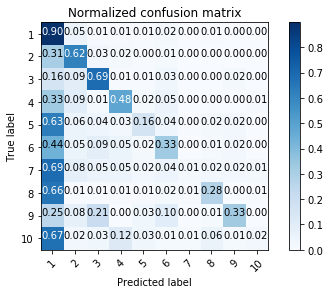

In [16]:
plot_confusion_matrix(conf_mat, classes=[1,2,3,4,5,6,7,8,9,10], normalize=True,
                      title='Normalized confusion matrix')

In [36]:
subm = pd.DataFrame(ypred, columns=['Sample_label'])
subm.index += 1
subm = subm.astype(int)
subm.to_csv('Solutions/svm_C_2111.csv',
            index_label='Sample_id')

In [30]:
#Try with different weight for each class. This should be around same as over sampling.
#Performs worse than class_weight=none (with these parameters)
C_ = 2.9
clf = svm.SVC(decision_function_shape='ovo', random_state=42, C=C_,class_weight='balanced')
fit = clf.fit(xtrain, ytrain)
print(fit.score(xtrain, ytrain))
ypred = fit.predict(xtest)

0.877607151043


In [31]:
scores = cross_val_score(clf, xtrain, ytrain, cv=5).mean()
print(scores)

0.623646740977


In [ ]:
for C_ in np.linspace(1.5, 3.5, 10):
    clf = svm.SVC(decision_function_shape='ovo', random_state=42, C=C_)
    scores = cross_val_score(clf, xtrain, ytrain, cv=5)
    print('C={}, gamma=1/n_features'.format(C_))
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

In [31]:
for C_ in range(1,10):
    clf = svm.SVC(decision_function_shape='ovo', random_state=42, C=C_)
    scores = cross_val_score(clf, xtrain, ytrain, cv=5)
    print('C={}, gamma=1/n_features'.format(C_))
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

C=1, gamma=1/n_features
Accuracy: 0.6372 (+/- 0.0084)
C=2, gamma=1/n_features
Accuracy: 0.6628 (+/- 0.0054)
C=3, gamma=1/n_features
Accuracy: 0.6624 (+/- 0.0072)
C=4, gamma=1/n_features
Accuracy: 0.6605 (+/- 0.0103)
C=5, gamma=1/n_features
Accuracy: 0.6569 (+/- 0.0124)
C=6, gamma=1/n_features
Accuracy: 0.6539 (+/- 0.0121)
C=7, gamma=1/n_features
Accuracy: 0.6566 (+/- 0.0139)
C=8, gamma=1/n_features
Accuracy: 0.6553 (+/- 0.0130)
C=9, gamma=1/n_features
Accuracy: 0.6537 (+/- 0.0115)


In [27]:
clf = svm.SVC(decision_function_shape='ovo', random_state=42)
scores = cross_val_score(clf, xtrain_s, ytrain_s, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Accuracy: 0.6232 (+/- 0.0288)


In [28]:
for C_ in range(1,10):
    clf = svm.SVC(decision_function_shape='ovo', random_state=42, C=C_)
    scores = cross_val_score(clf, xtrain_s, ytrain_s, cv=5)
    print('C={}, gamma=1/n_features'.format(C_))
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

C=1, gamma=1/n_features
Accuracy: 0.6232 (+/- 0.0288)
C=2, gamma=1/n_features
Accuracy: 0.6565 (+/- 0.0341)
C=3, gamma=1/n_features
Accuracy: 0.6759 (+/- 0.0437)
C=4, gamma=1/n_features
Accuracy: 0.6827 (+/- 0.0429)
C=5, gamma=1/n_features
Accuracy: 0.6861 (+/- 0.0408)
C=6, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0400)
C=7, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=8, gamma=1/n_features
Accuracy: 0.6860 (+/- 0.0386)
C=9, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)


In [29]:
for C_ in range(10,100,5):
    clf = svm.SVC(decision_function_shape='ovo', random_state=42, C=C_)
    scores = cross_val_score(clf, xtrain_s, ytrain_s, cv=5)
    print('C={}, gamma=1/n_features'.format(C_))
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

C=10, gamma=1/n_features
Accuracy: 0.6861 (+/- 0.0409)
C=15, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=20, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=25, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=30, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=35, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=40, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=45, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=50, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=55, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=60, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=65, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=70, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=75, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=80, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=85, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=90, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)
C=95, gamma=1/n_features
Accuracy: 0.6872 (+/- 0.0408)


In [25]:
for C_ in [10,100,1000,10000,100000,1000000]:
    for gamma_ in [0.1,1,10,100,1000,10000]:
        clf = svm.SVC(decision_function_shape='ovo', random_state=42, gamma=gamma_, C=C_)
        scores = cross_val_score(clf, xtrain_s, ytrain_s, cv=5)
        print('C={}, gamma={}'.format(C_, gamma_))
        print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

C=10, gamma=0.1
Accuracy: 0.5920 (+/- 0.0264)
C=10, gamma=1
Accuracy: 0.5920 (+/- 0.0264)
C=10, gamma=10
Accuracy: 0.5920 (+/- 0.0264)
C=10, gamma=100
Accuracy: 0.5920 (+/- 0.0264)
C=10, gamma=1000
Accuracy: 0.5920 (+/- 0.0264)
C=10, gamma=10000
Accuracy: 0.5920 (+/- 0.0264)
C=100, gamma=0.1
Accuracy: 0.5920 (+/- 0.0264)
C=100, gamma=1
Accuracy: 0.5920 (+/- 0.0264)
C=100, gamma=10
Accuracy: 0.5920 (+/- 0.0264)
C=100, gamma=100
Accuracy: 0.5920 (+/- 0.0264)
C=100, gamma=1000
Accuracy: 0.5920 (+/- 0.0264)
C=100, gamma=10000
Accuracy: 0.5920 (+/- 0.0264)
C=1000, gamma=0.1
Accuracy: 0.5920 (+/- 0.0264)
C=1000, gamma=1
Accuracy: 0.5920 (+/- 0.0264)
C=1000, gamma=10
Accuracy: 0.5920 (+/- 0.0264)
C=1000, gamma=100
Accuracy: 0.5920 (+/- 0.0264)
C=1000, gamma=1000
Accuracy: 0.5920 (+/- 0.0264)
C=1000, gamma=10000
Accuracy: 0.5920 (+/- 0.0264)
C=10000, gamma=0.1
Accuracy: 0.5920 (+/- 0.0264)
C=10000, gamma=1
Accuracy: 0.5920 (+/- 0.0264)
C=10000, gamma=10
Accuracy: 0.5920 (+/- 0.0264)
C=10000, g

In [16]:
ypred = fit.predict(xtest)
print(ypred)

[ 1.  1.  1. ...,  1.  3.  1.]


In [8]:
# ovo’, ‘ovr’, default=’ovr’
#+one-vs-rest (‘ovr’) 
#+one-vs-one (‘ovo’)

# line search on gamma and C
for C_ in [10,100,1000,10000,100000,1000000]:
    for gamma_ in [0.1,1,10,100,1000,10000]:
        clf = svm.SVC(decision_function_shape='ovo', random_state=42, gamma=gamma_, C=C_)
        fit = clf.fit(xtrain_s, ytrain_s)
        print('C={}, gamma={}'.format(C_, gamma_))
        print(fit.score(xtrain2, ytrain2))

C=10, gamma=0.1
0.529209621993
C=10, gamma=1
0.529209621993
C=10, gamma=10
0.529209621993
C=10, gamma=100
0.529209621993
C=10, gamma=1000
0.529209621993
C=10, gamma=10000
0.529209621993
C=100, gamma=0.1
0.529209621993
C=100, gamma=1
0.529209621993
C=100, gamma=10
0.529209621993
C=100, gamma=100
0.529209621993
C=100, gamma=1000
0.529209621993
C=100, gamma=10000
0.529209621993
C=1000, gamma=0.1
0.529209621993
C=1000, gamma=1
0.529209621993
C=1000, gamma=10
0.529209621993
C=1000, gamma=100
0.529209621993
C=1000, gamma=1000
0.529209621993
C=1000, gamma=10000
0.529209621993
C=10000, gamma=0.1
0.529209621993
C=10000, gamma=1
0.529209621993
C=10000, gamma=10
0.529209621993
C=10000, gamma=100
0.529209621993
C=10000, gamma=1000
0.529209621993
C=10000, gamma=10000
0.529209621993
C=100000, gamma=0.1
0.529209621993
C=100000, gamma=1
0.529209621993
C=100000, gamma=10
0.529209621993
C=100000, gamma=100
0.529209621993
C=100000, gamma=1000
0.529209621993
C=100000, gamma=10000
0.529209621993
C=1000000,

In [5]:
ypred = clf.predict(xtest)

In [6]:
print(ypred.shape)
print(ypred[0:100])
print(ypred[-100:])

(6544,)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [7]:
# try both C=10,100, all gives 1.
clf = svm.SVC(C=100,decision_function_shape='ovo')
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print(ypred[0:100])
print(ypred[-100:])

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [22]:
lin=svm.SVC(kernel='linear')

In [ ]:
#works but gives bad score. Also takes long to run, but have the feeling this is due to my laptop
lin.fit(xtrain,ytrain)
ypredlin=lin.predict(xtest)
print(ypredlin)

In [ ]:
pol=svm.SVC(kernel='poly',degree=3)

In [ ]:
#same as linear, works but not so good result
#so guess we have to use rbf
pol.fit(xtrain,ytrain)
ypredpol=pol.predict(xtest)
print(ypredpol)

In [ ]:
#nice articel explaining the influence of C and gamma for rbf
#https://chrisalbon.com/machine-learning/svc_parameters_using_rbf_kernel.html

In [10]:
#tried some optunity tuning but it took very long. 
#important to note is that it cannot really do it for multiple classes. 
#but can try it for two classes, e.g. all pop and non-pop songs. 
#example: http://optunity.readthedocs.io/en/latest/notebooks/notebooks/sklearn-svc.html